c:\Users\hadil\anaconda3\envs\DL\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hadil\anaconda3\envs\DL\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\hadil\anaconda3\envs\DL\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` 

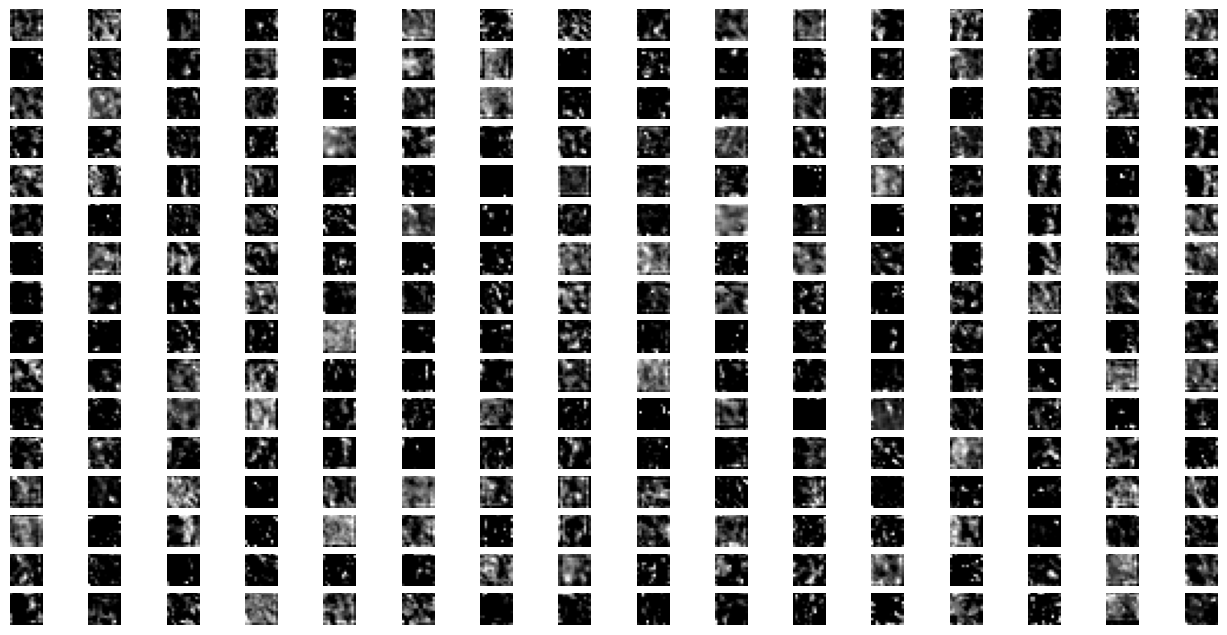

In [21]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.models as models
import cv2 as cv
from sklearn.decomposition import PCA



class AlexNet():
    def __init__(self, weights='ImageNet', last_layer_ind=-1):
        
        if weights == 'ImageNet':
            pretrained_model = models.resnet18(pretrained=True)

        self.layer = list(pretrained_model.children())[:-3]
        
    def __str__(self):
        return 'alexnet'
    
    def describe(self, image_path):
        # Requires image to be Pillow.

        # Load the image and apply the necessary transformations
        image = Image.open(image_path).convert('RGB')
        transform = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
        image = transform(image)
        image = image.unsqueeze(0)  # Add batch dimension

        model = nn.Sequential(*self.layer)
        model.eval()
        with torch.no_grad():
                features = model(image)

        return features.squeeze()


if __name__ == "__main__":
    image_path = "C:/Users/hadil/Documents/projects/Machine Learning/project/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/40X/SOB_B_A-14-22549AB-40-001.png"
    pretrained_model = models.alexnet(pretrained=True)

    pass

obj = AlexNet('ImageNet', -1)
obj.describe(image_path)
features = obj.describe(image_path)

# Create a 16x32 grid of subplots (to fit all 512 features)
fig, axs = plt.subplots(nrows=16, ncols=16, figsize=(16, 8))

# Loop over the features and plot each one as an image in a subplot
for i in range(len(features)):
    row = i // 16
    col = i % 16
    axs[row, col].imshow(features[i], cmap='gray')
    axs[row, col].axis('off')

# Show the plot
plt.show()

In [24]:
import numpy as np

# Apply SVD on each 14x14 matrix and keep the desired number of singular values and vectors
n_components = 100
reduced_matrices = []

for i in range(256):
    matrix = features[i]
    u, s, vh = np.linalg.svd(matrix)
    
    # Keep the desired number of singular values and vectors
    u_reduced = u[:, :n_components]
    s_reduced = np.diag(s[:n_components])
    vh_reduced = vh[:n_components, :]
    
    # Reconstruct the matrix
    matrix_reduced = u_reduced @ s_reduced @ vh_reduced
    reduced_matrices.append(matrix_reduced)

# Combine the reconstructed matrices back into a 3D tensor
reduced_tensor = np.stack(reduced_matrices, axis=0)

In [20]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming your tensor is named 'tensor'
tensor = np.random.rand(256, 14, 14)

# Reshape the tensor to a 2D matrix
matrix = features.reshape(256, -1)

# Apply PCA
n_components = 100  # Adjust this value according to your desired number of components
pca = PCA(n_components=n_components)
reduced_matrix = pca.fit_transform(matrix)

# Transform the reduced matrix back to the original shape
reduced_tensor = reduced_matrix.reshape(256, 14, 14)

ValueError: cannot reshape array of size 25600 into shape (156,14,14)